In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utils.misc as mutil
reload(mutil);

In [2]:
def plot_regrets_all_noise_levels(arrival_rate, noise_variance_list):
    print('[1,   T^{1/3}, sqrt(T)log(T)] coefficients:')
    for noise_variance in noise_variance_list:
        current_result = np.load('./results/regret-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')
        numerical_regret = current_result[1,:] - current_result[2,:]
        theoretical_regret, curve_coefficients = mutil.fit_regret_curve(current_result[0,:], numerical_regret)
        print(np.array2string(curve_coefficients, precision=3, suppress_small=True))
        plt.plot(current_result[0,:], numerical_regret, label = 'sigma = ' + str(noise_variance))
        # plt.plot(current_result[0,:], theoretical_regret, '-.', label = 'thertcl sigma = ' + str(noise_variance))
    plt.legend()
    plt.show()

def plot_theoretical_regret(arrival_rate, noise_variance):
    current_result = np.load('./results/regret-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')
    numerical_regret = current_result[1,:] - current_result[2,:]
    theoretical_regret, curve_coefficients = mutil.fit_regret_curve(current_result[0,:], numerical_regret)
    print('Coefficients for [1, T^{1/3}, sqrt(T)log(T)] = ' + np.array2string(curve_coefficients, precision=3, suppress_small=True))
    plt.plot(current_result[0,:], numerical_regret, label = 'numerical regret')
    plt.plot(current_result[0,:], theoretical_regret, '-.', label = 'theoretical regret')
    plt.legend()
    plt.show()

In [3]:
noise_variance_list = [0, 0.01, 0.05, 0.1] 

[1,   T^{1/3}, sqrt(T)log(T)] coefficients:
[ 0.    64.398  0.771]
[ 0.    59.69   2.003]
[ 0.    87.856  2.785]
[100.    100.      3.572]


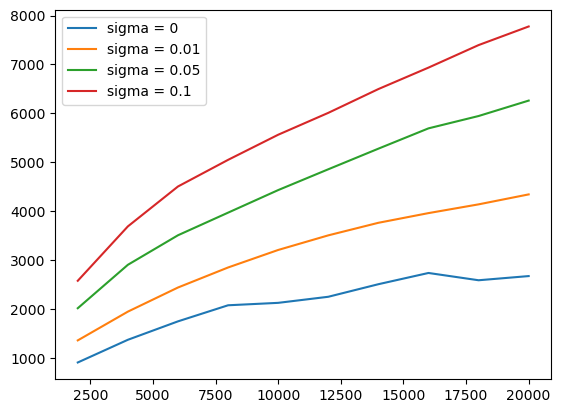

In [4]:
plot_regrets_all_noise_levels(2, noise_variance_list)

[1,   T^{1/3}, sqrt(T)log(T)] coefficients:
[ 0.    29.529  2.782]
[ 0.    11.972  3.858]
[ 0.    15.283  4.61 ]
[ 0.    22.641  5.182]


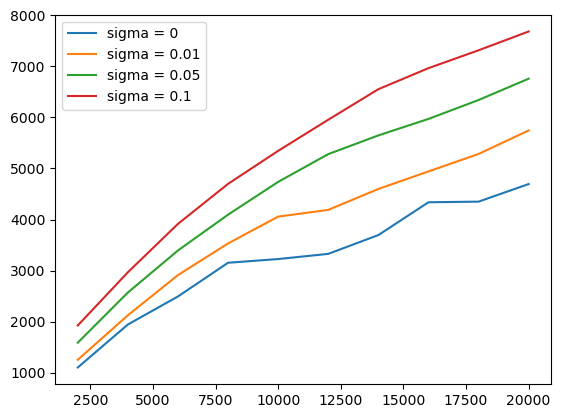

In [5]:
plot_regrets_all_noise_levels(4, noise_variance_list)

[1,   T^{1/3}, sqrt(T)log(T)] coefficients:
[ 34.073 100.      0.5  ]
[ 0.    88.669  1.511]
[ 0.    74.861  2.616]
[ 0.    41.505  3.983]


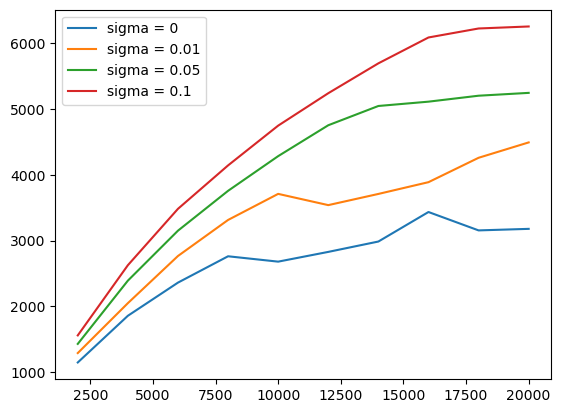

In [6]:
plot_regrets_all_noise_levels(6, noise_variance_list)